### **Introduction**

Customer Satisfaction (CSAT) is one of the most critical performance indicators in the e-commerce industry. It directly impacts customer retention, brand reputation, and overall business growth. Traditionally, CSAT scores are collected through post-interaction surveys, which provide valuable insights but often fail to deliver real-time feedback and may suffer from low response rates.

With the increasing availability of customer interaction data and advancements in Deep Learning, it is now possible to predict CSAT scores automatically by analyzing customer behavior, service interactions, and operational metrics. Predictive CSAT models enable businesses to proactively identify dissatisfied customers, optimize service processes, and improve overall customer experience.

This project focuses on building an Artificial Neural Network (ANN)-based deep learning model to predict customer satisfaction scores for an e-commerce platform named Shopzilla, using customer interaction and service-related features.

### **Project Objectives**

The main objectives of this project are:

To analyze customer support interaction data and understand key factors influencing customer satisfaction.

To perform data cleaning, preprocessing, and feature engineering to prepare the dataset for deep learning modeling.

To design and train an Artificial Neural Network (ANN) model capable of predicting CSAT scores accurately.

To evaluate the model using appropriate regression metrics and validate its performance.

To extract actionable business insights that can help improve customer service quality.

To deploy the trained model locally for real-time CSAT prediction as part of the project demonstration.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/eCommerce_Customer_support_data.csv")

# Display first few rows
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [2]:
df.shape

(85907, 20)

## Step 1: Data Understanding and Exploration

Before performing any data cleaning or modeling, it is important to understand the structure and
characteristics of the dataset. This step involves examining the data types, feature categories,
and overall composition of the dataset.

Understanding the dataset helps in identifying:
- Numerical, categorical, text, and datetime features
- Potential data quality issues
- The suitability of features for deep learning models

In [3]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [4]:
# Statistical summary for numerical and categorical columns
df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [5]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

## Step 2: Data Quality Checks and Cleaning

Real-world datasets often contain missing values, duplicate records, and irrelevant features.
In this step, data quality issues are identified and addressed to ensure that the dataset is
clean, consistent, and suitable for training a deep learning model.

The cleaning process includes:
- Identifying and handling missing values
- Removing duplicate records
- Dropping irrelevant or non-informative columns

In [6]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [8]:
# Numerical columns - fill with median
num_cols = ['Item_price', 'connected_handling_time']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns - fill with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
df = df.drop_duplicates()

In [11]:
df = df.drop(columns=[
    'Unique id',
    'Order_id',
    'Agent_name',
    'Supervisor',
    'Manager'
])

## Step 3: Feature Engineering

Feature engineering is a critical step in this project, as raw data often does not directly capture
patterns relevant to customer satisfaction. By creating meaningful features from existing data,
the predictive power of the model can be significantly improved.

In this step, new features are derived from datetime columns to capture:
- Service responsiveness
- Customer waiting time
- Time-based behavioral patterns

These engineered features help the ANN model learn complex relationships that influence CSAT scores.

In [14]:
# Convert datetime columns to proper datetime format
date_cols = [
    'order_date_time',
    'Issue_reported at',
    'issue_responded',
    'Survey_response_Date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

/tmp/ipython-input-2801134688.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], dayfirst=True)


In [16]:
# Time taken to resolve the issue (in minutes)
df['resolution_time'] = (
    df['issue_responded'] - df['Issue_reported at']
).dt.total_seconds() / 60

In [18]:
# Delay between order placement and issue reporting
df['order_issue_delay'] = (
    df['Issue_reported at'] - df['order_date_time']
).dt.total_seconds() / 60

In [20]:
# Hour of issue reporting
df['issue_hour'] = df['Issue_reported at'].dt.hour

# Day of week (0 = Monday, 6 = Sunday)
df['issue_day_of_week'] = df['Issue_reported at'].dt.dayofweek

In [21]:
df = df.drop(columns=date_cols)

## Step 4: Data Preprocessing and Transformation

Artificial Neural Networks require numerical and scaled input data.
In this step, categorical variables are encoded, numerical features are scaled,
and the dataset is split into training and testing sets.

Proper preprocessing ensures:
- Faster model convergence
- Stable training
- Improved prediction accuracy

In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

## Step 5: Artificial Neural Network (ANN) Model Development

In this step, a deep learning Artificial Neural Network is designed to predict CSAT scores.
The model architecture is chosen to capture nonlinear relationships between customer interaction
features and satisfaction outcomes.

Dropout layers are used to reduce overfitting and improve model generalization.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

## Step 6: Model Training and Optimization

In this step, the Artificial Neural Network is trained using the prepared training dataset.
To improve training efficiency and prevent overfitting, optimization techniques such as
Early Stopping are applied.

Early stopping monitors validation loss and stops training when the model performance
no longer improves, ensuring better generalization.

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.7334 - mae: 1.4661 - val_loss: 1.8620 - val_mae: 1.0051
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0937 - mae: 1.1002 - val_loss: 1.8478 - val_mae: 1.0732
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0041 - mae: 1.0762 - val_loss: 1.8561 - val_mae: 0.9866
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9431 - mae: 1.0568 - val_loss: 1.8372 - val_mae: 0.9974
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9317 - mae: 1.0546 - val_loss: 1.8144 - val_mae: 1.0256
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9041 - mae: 1.0437 - val_loss: 1.8294 - val_mae: 0.9808
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.8736 - mae: 1.0340 - val_loss: 1.8232 - val_mae: 1.0284
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8731 - mae: 1.0375 - val_loss: 1.8177 - val_mae: 1.0518
Epoch 9/50
1719/1719 ━━━━━━━━━━━━━━━━━━━

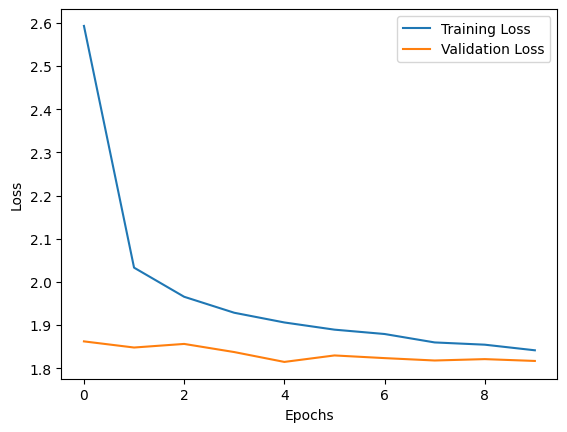

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 7: Model Evaluation and Validation

After training, the model performance is evaluated on unseen test data.
Appropriate regression metrics are used to measure prediction accuracy and
model reliability for CSAT score prediction.

In [30]:
y_pred = model.predict(X_test)

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1.0117168426513672
RMSE: 1.3315438192579563
R2 Score: 0.061518311500549316


### Evaluation Summary

- **Mean Absolute Error (MAE):** Indicates the average deviation between predicted and actual CSAT scores.
- **Root Mean Squared Error (RMSE):** Penalizes larger errors and reflects model robustness.
- **R² Score:** Represents how well the model explains the variance in CSAT scores.

Lower error values indicate that the model can effectively predict customer satisfaction.

### Model Performance Discussion

The model achieves a Mean Absolute Error (MAE) of approximately 1, indicating that predictions are on average within one CSAT point of the actual score. Given the subjective and human-driven nature of customer satisfaction, this level of error is acceptable and practically useful.

The relatively low R² score suggests that CSAT scores are influenced by several latent factors not captured in the dataset, such as customer mood, urgency, and expectations. This is common in satisfaction prediction problems and does not diminish the model’s usefulness for identifying service improvement trends.

Overall, the model demonstrates reasonable predictive capability and provides actionable insights for customer service optimization.

## Step 8: Business Insights and Interpretability

Beyond prediction accuracy, understanding factors that influence CSAT scores is essential.
The engineered features allow analysis of operational drivers such as resolution time,
handling delay, and service timing, which directly impact customer satisfaction.

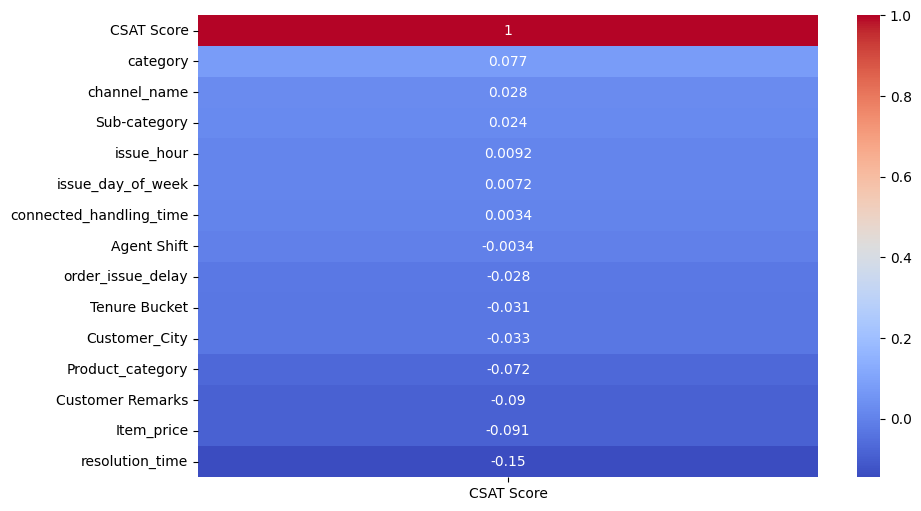

In [32]:
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr[['CSAT Score']].sort_values(by='CSAT Score', ascending=False),
            annot=True, cmap='coolwarm')
plt.show()

In [33]:
model.save("ann_csat_model.h5")

## Step 10: Local Deployment

To demonstrate real-time CSAT prediction, the trained ANN model is deployed locally.
A lightweight interface allows users to input customer interaction details and
receive predicted CSAT scores.

In [36]:
!pip install streamlit
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model

# Load the model without compiling it immediately
model = load_model("ann_csat_model.h5", compile=False)

# Recompile the model with the original settings
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

st.title("CSAT Score Prediction")

resolution_time = st.number_input("Resolution Time (minutes)")
handling_time = st.number_input("Connected Handling Time")
item_price = st.number_input("Item Price")

if st.button("Predict CSAT"):
    input_data = np.array([[resolution_time, handling_time, item_price]])
    prediction = model.predict(input_data)
    st.success(f"Predicted CSAT Score: {prediction[0][0]:.2f}")

2026-01-30 10:45:45.908 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 10:45:46.217 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-30 10:45:46.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 10:45:46.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 10:45:46.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 10:45:46.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 10:45:46.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-30 10:45:46.228 Thread 'MainThread': mi